In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data from below link:
https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

In [2]:
df = pd.read_csv('Country-data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
df.shape

(167, 10)

# Bivariate Analysis

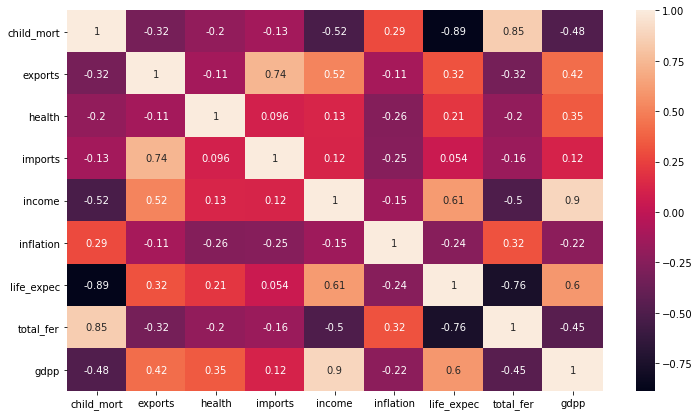

In [8]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Optimal number of clusters

Silhouette method https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/#:~:text=The%20optimal%20number%20of%20clusters%20k%20is%20one%20that%20maximizes,Optimal%20of%202%20clusters.

In [9]:
range_n_clusters = [i for i in range(2,10)]

In [10]:
range_n_clusters

[2, 3, 4, 5, 6, 7, 8, 9]

In [11]:
silhouette_distance = []
sum_of_squared_distances = []

In [12]:
df1 = df.drop('country', axis =1)

In [13]:
for num_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters = num_cluster)
    kmeans.fit(df1)
    cluster_labels = kmeans.labels_
    silhouette_distance.append(silhouette_score(df1, cluster_labels))
    sum_of_squared_distances.append(kmeans.inertia_)

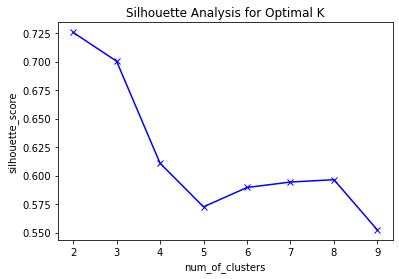

In [14]:
plt.plot(range_n_clusters, silhouette_distance,'bx-')
plt.xlabel('num_of_clusters')
plt.ylabel('silhouette_score')
plt.title("Silhouette Analysis for Optimal K")
plt.show()

WCSS (Within Cluster Sum of squares)

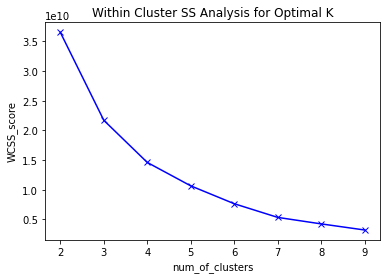

In [15]:
plt.plot(range_n_clusters, sum_of_squared_distances,'bx-')
plt.xlabel('num_of_clusters')
plt.ylabel('WCSS_score')
plt.title("Within Cluster SS Analysis for Optimal K")
plt.show()

From both silhouette method and wcss method, it is optimal to take number of clusters as k = 3

# K-Means clustering

In [16]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df1)

KMeans(n_clusters=3)

In [17]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [18]:
df['label'] = kmeans.labels_

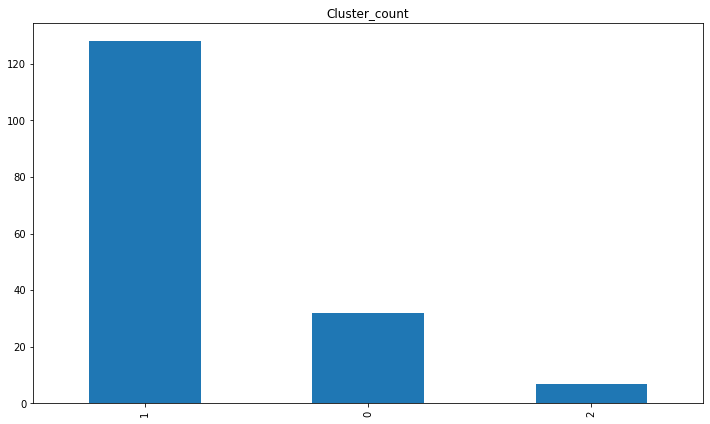

In [19]:
plt.figure(figsize = (12,7))
df['label'].value_counts().plot.bar()
plt.title('Cluster_count')
plt.show()

In [20]:
df[df['label'] == 0].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.0
mean,8.800000,49.978125,8.991563,46.021875,37621.875000,3.383312,79.15625,1.944687,35587.500000,0.0
std,18.906715,29.064708,2.972031,25.984024,7646.619931,6.037584,3.97045,0.752132,12060.245276,0.0
min,2.600000,12.400000,2.770000,13.600000,22900.000000,-3.220000,60.90000,1.230000,17100.000000,0.0
25%,3.875000,28.875000,7.817500,30.775000,31825.000000,0.570000,79.30000,1.455000,23175.000000,0.0
50%,4.250000,47.800000,9.450000,40.950000,37850.000000,1.190000,80.20000,1.865000,35400.000000,0.0
75%,6.350000,65.775000,10.775000,57.850000,42975.000000,3.347500,81.32500,2.035000,46375.000000,0.0
max,111.000000,153.000000,17.900000,154.000000,57600.000000,24.900000,82.80000,5.210000,58000.000000,0.0


In [22]:
df[df['label'] == 1].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.0
mean,47.389844,35.865617,6.332031,45.921609,8569.242188,8.957648,67.873437,3.263359,4438.390625,1.0
std,40.972276,19.240987,2.348954,19.737419,6833.699409,11.361343,8.259192,1.555788,4100.482425,0.0
min,4.500000,0.109000,1.970000,0.065900,609.000000,-4.210000,32.100000,1.250000,231.000000,1.0
25%,16.575000,22.500000,4.855000,30.675000,2470.000000,2.617500,61.775000,2.055000,1030.000000,1.0
50%,30.750000,31.950000,5.885000,44.000000,6720.000000,6.370000,69.800000,2.665000,3075.000000,1.0
75%,68.075000,47.925000,7.667500,58.675000,13350.000000,12.100000,74.500000,4.602500,6567.500000,1.0
max,208.000000,93.800000,14.200000,108.000000,29600.000000,104.000000,80.400000,7.490000,16600.000000,1.0


In [23]:
df[df['label'] == 2].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0
mean,6.228571,96.442857,5.712857,68.571429,80342.857143,6.388714,80.285714,1.767143,65442.857143,2.0
std,3.707971,63.326478,3.829194,62.521269,22950.733986,5.999308,2.087605,0.362248,26336.340998,0.0
min,2.800000,39.700000,1.810000,23.800000,55500.000000,-0.046000,77.100000,1.150000,35300.000000,2.0
25%,3.000000,63.150000,2.735000,28.250000,67200.000000,1.968500,78.850000,1.575000,42550.000000,2.0
50%,4.500000,66.700000,3.960000,30.400000,75200.000000,5.950000,81.000000,1.840000,70300.000000,2.0
75%,9.750000,121.200000,8.625000,97.650000,86150.000000,9.090000,81.750000,2.010000,81200.000000,2.0
max,10.800000,200.000000,11.500000,174.000000,125000.000000,16.700000,82.700000,2.210000,105000.000000,2.0


# Summary

From the stats obtained above for each clusters, we can say that:
- Allocation of fund needs to be concentrated towards country in CLuster 1, as their socio economic and health situation is bad as compared to countries in other clusters 
- Countries in cluster 2 seems to be rich countires with the socio economic and health status being the best among all clusters